In [71]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math
from sklearn.preprocessing import StandardScaler
dff = pd.read_csv('finalinput.csv')

In [72]:
def getPCA():
    result = []
    data = pd.read_csv('finalinput.csv')
    data=data.dropna()
    X = data.ix[:,1:5].values
    y = data.ix[:,4].values
    X_std = StandardScaler().fit_transform(X)
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
    cov_mat = np.cov(X_std.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    cor_mat2 = np.corrcoef(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort()
    eig_pairs.reverse()
    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    #print('Eigenvalues in descending order:')
    print(eig_vecs)
    for i in eig_pairs:
        result.append(i[0])
    return result
getPCA()

[[-0.49777387 -0.42540269 -0.74121065 -0.147853  ]
 [-0.35565649 -0.68818453  0.6323415   0.00739793]
 [-0.535036    0.47229369  0.22085218 -0.66475519]
 [-0.5826372   0.34981891  0.04444458  0.73224675]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


[2.3110006582647884,
 1.1663254629103523,
 0.38839319530887961,
 0.13428068351598052]

In [75]:
#natural gold silver
def model1(df):
    result = {} 
    dfs = np.split(df, [1,2,5], axis=1)
    dfx = dfs[2][1:]
    x = np.matrix(dfx.values)
    dfy = dfs[1][:-1]
    y = np.matrix(dfy.values)
    temp1 = np.transpose(x)
    a = temp1 * x
    ainv = inv(np.matrix(a,dtype = 'float'))
    pre = np.matrix(ainv,dtype = 'float') * np.matrix(temp1,dtype = 'float')
    b = np.matrix(pre,dtype = 'float') * np.matrix(y,dtype = 'float')
    yest = np.matrix(x,dtype = 'float')*np.matrix(b,dtype = 'float')
    error = yest - y
    sumofsquares = 0
    for x1 in error:
        sumofsquares = sumofsquares + x1*x1
    yavg = np.mean(y)
    rmserror = math.sqrt(sumofsquares//x.shape[0])
    result['rmserror'] = rmserror
    sumofvaluesdifference = 0;
    for yt in y:
        sumofvaluesdifference = sumofvaluesdifference + (yt - yavg)*(yt - yavg) 
    Rsquare = 1 -  ((sumofsquares)/(sumofvaluesdifference))
    result['beta'] = b
    return result
#b1 = (x'x)-1 x' y

In [76]:
#crudeoil natural gold silver
def model2(df):
    result = {} 
    dfs = np.split(df, [0,1,5], axis=1)
    dfs1 = np.split(df, [1,2,5], axis=1)
    dfx = dfs[2][1:]
    x = np.matrix(dfx.values)
    dfy = dfs1[1][:-1]
    y = np.matrix(dfy.values)
    temp1 = np.transpose(x)
    a = temp1 * x
    ainv = inv(np.matrix(a,dtype = 'float'))
    pre = np.matrix(ainv,dtype = 'float') * np.matrix(temp1,dtype = 'float')
    b = np.matrix(pre,dtype = 'float') * np.matrix(y,dtype = 'float')
    yest = np.matrix(x,dtype = 'float')*np.matrix(b,dtype = 'float')
    error = yest - y
    sumofsquares = 0
    for x1 in error:
        sumofsquares = sumofsquares + x1*x1
    yavg = np.mean(y)
    rmserror = math.sqrt(sumofsquares//x.shape[0])
    result['rmserror'] = rmserror
    sumofvaluesdifference = 0;
    for yt in y:
        sumofvaluesdifference = sumofvaluesdifference + (yt - yavg)*(yt - yavg) 
    Rsquare = 1 -  ((sumofsquares)/(sumofvaluesdifference))
    result['beta'] = b
    return result
#b1 = (x'x)-1 x' y

In [77]:
def model3(df):
    result = {} 
    dfs = np.split(df, [1,2,5], axis=1)
    dfx = dfs[1][1:]
    x = np.matrix(dfx.values)
    dfy = dfs[1][:-1]
    y = np.matrix(dfy.values)
    temp1 = np.transpose(x)
    a = temp1 * x
    ainv = inv(np.matrix(a,dtype = 'float'))
    pre = np.matrix(ainv,dtype = 'float') * np.matrix(temp1,dtype = 'float')
    b = np.matrix(pre,dtype = 'float') * np.matrix(y,dtype = 'float')
    yest = np.matrix(x,dtype = 'float')*np.matrix(b,dtype = 'float')
    error = yest - y
    sumofsquares = 0
    for x1 in error:
        sumofsquares = sumofsquares + x1*x1
    yavg = np.mean(y)
    rmserror = math.sqrt(sumofsquares//x.shape[0])
    result['rmserror'] = rmserror
    sumofvaluesdifference = 0;
    for yt in y:
        sumofvaluesdifference = sumofvaluesdifference + (yt - yavg)*(yt - yavg) 
    Rsquare = 1 -  ((sumofsquares)/(sumofvaluesdifference))
    result['beta'] = b
    return result
#b1 = (x'x)-1 x' y

In [78]:
#crudeoil ads
def model4(df):
    result = {} 
    dfx = df[['CRUDEOIL','ADS_Index_111618']][1:]
    x = np.matrix(dfx.values)
    dfy = df[['CRUDEOIL']][:-1]
    y = np.matrix(dfy.values)
    temp1 = np.transpose(x)
    a = temp1 * x
    ainv = inv(np.matrix(a,dtype = 'float'))
    pre = np.matrix(ainv,dtype = 'float') * np.matrix(temp1,dtype = 'float')
    b = np.matrix(pre,dtype = 'float') * np.matrix(y,dtype = 'float')
    yest = np.matrix(x,dtype = 'float')*np.matrix(b,dtype = 'float')
    error = yest - y
    sumofsquares = 0
    for x1 in error:
        sumofsquares = sumofsquares + x1*x1
    yavg = np.mean(y)
    rmserror = math.sqrt(sumofsquares//x.shape[0])
    result['rmserror'] = rmserror
    sumofvaluesdifference = 0;
    for yt in y:
        sumofvaluesdifference = sumofvaluesdifference + (yt - yavg)*(yt - yavg) 
    Rsquare = 1 -  ((sumofsquares)/(sumofvaluesdifference))
    result['beta'] = b
    return result
#b1 = (x'x)-1 x' y

In [79]:
#crudeoil natural gold silver
def model5(df):
    result = {} 
    pca = getPCA()
    n = df.shape[0] 
    X1 = pca[0]*np.ones((n,1))
    X2 = pca[1]*np.ones((n,1))
    X3 = pca[2]*np.ones((n,1))
    X4 = pca[3]*np.ones((n,1))
    x = np.hstack((X1,X2,X3,X4))
    x = x[1:]
    x = np.matrix(x)
    dfy = df[['CRUDEOIL']][:-1]
    y = np.matrix(dfy.values)
    temp1 = np.transpose(x)
    a = temp1 * x
    ainv = inv(np.matrix(a,dtype = 'float'))
    pre = np.matrix(ainv,dtype = 'float') * np.matrix(temp1,dtype = 'float')
    b = np.matrix(pre,dtype = 'float') * np.matrix(y,dtype = 'float')
    yest = np.matrix(x,dtype = 'float')*np.matrix(b,dtype = 'float')
    error = yest - y
    sumofsquares = 0
    for x1 in error:
        sumofsquares = sumofsquares + x1*x1
    yavg = np.mean(y)
    rmserror = math.sqrt(sumofsquares//x.shape[0])
    result['rmserror'] = rmserror
    sumofvaluesdifference = 0;
    for yt in y:
        sumofvaluesdifference = sumofvaluesdifference + (yt - yavg)*(yt - yavg) 
    Rsquare = 1 -  ((sumofsquares)/(sumofvaluesdifference))
    result['beta'] = b
    return result
#b1 = (x'x)-1 x' y

In [80]:
def calculateRMS(b,test,columns):
    #columns = ['CRUDEOIL','NATURALGAS','GOLD','SILVER']
    constcolumn = ['CRUDEOIL']
    dfx = pd.DataFrame(test, columns=columns)
    dfx = dfx[1:]
    x = np.matrix(dfx.values)
    dfy = pd.DataFrame(test, columns=['CRUDEOIL'])
    dfy = dfy[:-1]
    y = np.matrix(dfy.values)
    yest = np.matrix(x,dtype = 'float')*np.matrix(b,dtype = 'float')
    error = yest - y
    sumofsquares = 0
    for x1 in error:
        sumofsquares = sumofsquares + x1*x1
    rmserror = math.sqrt(sumofsquares//x.shape[0])
    return rmserror

In [81]:
def RandomForestPredict(inputval):
    df = pd.read_csv('finalinput.csv')
    model = {}
    finalmodels = [];
    cols =  [['NATURALGAS','GOLD','SILVER'],
            ['CRUDEOIL','NATURALGAS','GOLD','SILVER'],
            ['CRUDEOIL'],
            ['CRUDEOIL','ADS_Index_111618'],
            ['CRUDEOIL','NATURALGAS','GOLD','SILVER']]
    df = pd.read_csv('finalinput.csv')
    split_ratio = 0.7
    dfs_train = df[:int(df.shape[0] * split_ratio)]
    dfs_test = df[int(df.shape[0] * split_ratio) + 1 : df.shape[0]]
    
    for i in range(0,5):
        rmsvalue = 1000000
        s = dfs_train.sample(frac=0.4, replace=True)
        model[0] = model1(s)
        model[1] = model2(s)
        model[2] = model3(s)
        model[3] = model4(s)
        model[4] = model5(s)          

        bestmodel = None
        bestmodelcol = 0
        for j in range(0,4):
            b = model[j]['beta']
            k = calculateRMS(b,dfs_test,cols[j])
            if (k < rmsvalue):                
                rmsvalue = k
                bestmodelcol = j
                bestmodel = b
        print(cols[bestmodelcol])
        finalmodels.append((bestmodel,cols[bestmodelcol]))
    y = 0
    for element in finalmodels:
        d = pd.DataFrame(inputval, columns = element[1])
        yest = np.matrix(d.values,dtype = 'float')*np.matrix(element[0],dtype = 'float')
        y = y + yest 
    yp = y / len(finalmodels)
    return yp 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2') # Setting the style of the plots.

my_year_month_fmt = mdates.DateFormatter('%m/%y') # Creating a custom data formatter.

In [83]:
data = pd.read_csv('Randomforestop.csv')
data1 = pd.read_csv('Randomforestop.csv')
data.head(3)

,observation_date,PCRUDEOIL,CRUDEOIL,FCRUDEOIL
0,9/10/2018,66.322638,76.77,78.322638
1,9/7/2018,66.652141,75.55,78.652141
2,9/6/2018,67.426336,75.67,79.426336


In [84]:
data.tail(3)

,observation_date,PCRUDEOIL,CRUDEOIL,FCRUDEOIL
1867,3/21/2011,100.075238,114.92,112.075238
1868,3/18/2011,100.526029,114.13,112.526029
1869,3/17/2011,97.157987,114.18,109.157988


In [63]:
import datetime
data['observation_date'] = pd.to_datetime(data['observation_date'])
data.index = data['observation_date']
del data['observation_date']

In [59]:
dff.head(3)

,observation_date,CRUDEOIL,NATURALGAS,GOLD,SILVER,ADS_Index_111618
0,9/10/2018,76.77,2.90,11.33,19.20,0.094612
1,9/7/2018,75.55,2.88,11.30,19.20,0.135909
2,9/6/2018,75.67,2.93,11.54,19.28,0.150922


In [ ]:
import datetime
data['observation_date'] = pd.to_datetime(data['observation_date'])
data.index = data['observation_date']
del data['observation_date']

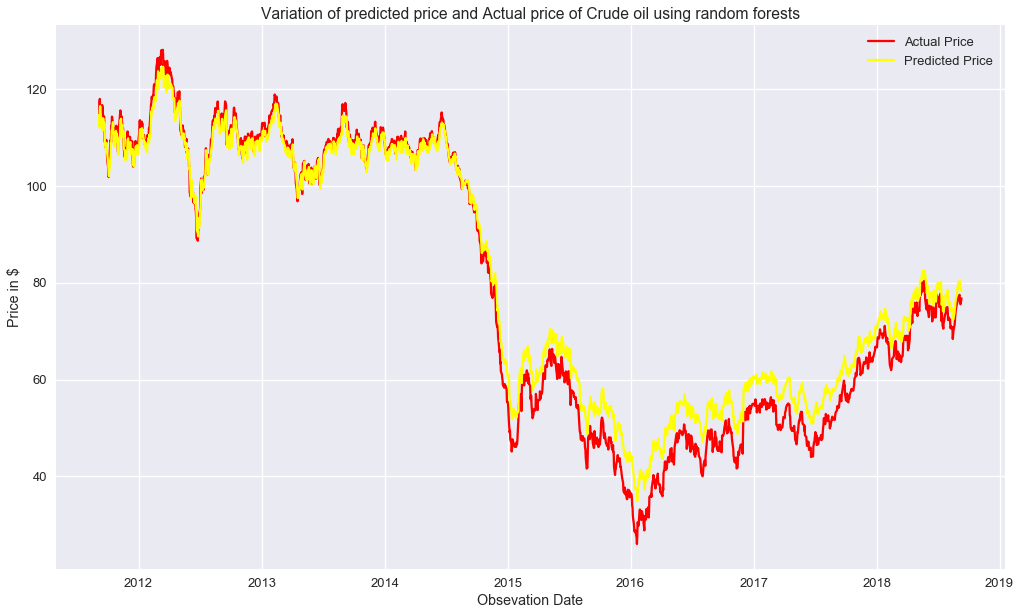

In [15]:
data= pd.read_csv('finalinput.csv')
start_date = '2018-09-10'
end_date = '2011-09-04'

fig, ax = plt.subplots(figsize=(17,10))

#ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'PCRUDEOIL'], label='Predicted Price', color = 'blue')
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'CRUDEOIL'], label = 'Actual Price', color = 'red')
ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'FCRUDEOIL'], label = 'Predicted Price', color = 'yellow')


ax.legend(loc='best')
ax.set_title('Variation of predicted price and Actual price of Crude oil using random forests')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
#ax.xaxis.set_major_formatter(my_year_month_fmt)


In [23]:
start_date = '2018-09-10'
end_date = '2017-12-04'
dataoneyear = data.loc[start_date:end_date, :]
dataplot = dataoneyear
dataplot.head()

,PCRUDEOIL,CRUDEOIL,FCRUDEOIL
observation_date,,,
2018-09-10,66.322638,76.77,78.322638
2018-09-07,66.652141,75.55,78.652141
2018-09-06,67.426336,75.67,79.426336
2018-09-05,68.407357,76.68,80.407357
2018-09-04,67.988267,77.51,79.988267


In [27]:
dataplot = dataoneyear[['FCRUDEOIL']]
dataplot = dataplot.diff()
dataplot = dataplot.apply(np.sign)

In [39]:
dataplot.tail(10)

,FCRUDEOIL
observation_date,
2017-12-15,-1.0
2017-12-14,-1.0
2017-12-13,1.0
2017-12-12,1.0
2017-12-11,-1.0
2017-12-08,-1.0
2017-12-07,1.0
2017-12-06,1.0
2017-12-05,1.0


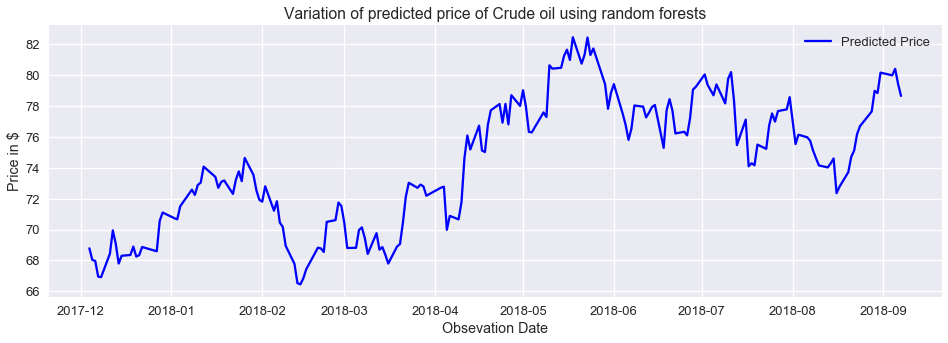

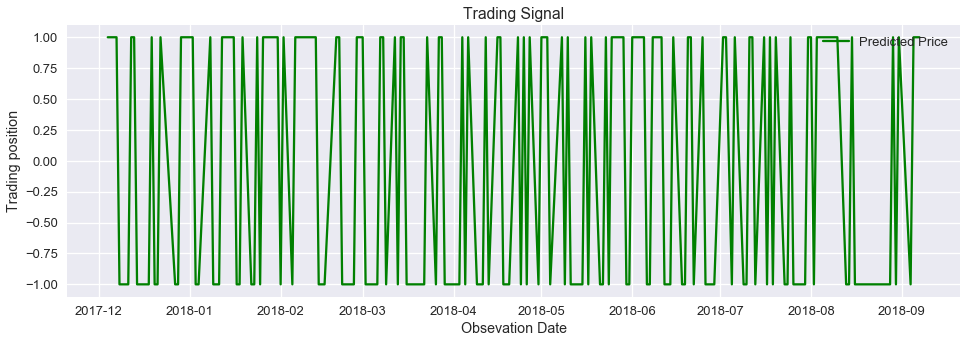

In [43]:
start_date = '2018-09-07'
end_date = '2017-12-04'

fig, ax1 = plt.subplots(figsize=(16,5))
fig, ax2 = plt.subplots(figsize=(16,5))


ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'FCRUDEOIL'], label = 'Predicted Price', color = 'blue')


ax1.legend(loc='best')
ax1.set_title('Variation of predicted price of Crude oil using random forests')
ax1.set_xlabel('Obsevation Date')
ax1.set_ylabel('Price in $')

ax2.plot(dataplot.loc[start_date:end_date, :].index, dataplot.loc[start_date:end_date, 'FCRUDEOIL'],  label = 'Predicted Price',color = 'green')
ax2.legend(loc='upper right')
ax2.set_title('Trading Signal')
ax2.set_xlabel('Obsevation Date')
ax2.set_ylabel('Trading position')


In [20]:
data1 = pd.read_csv('Randomforestop.csv')
data1['observation_date'] = pd.to_datetime(data1['observation_date'])
data1.index = data1['observation_date']
del data1['observation_date']
start_date = '2018-09-10'
end_date = '2017-12-04'
dataoneyear = data1.loc[start_date:end_date, :]
dataplot = dataoneyear
dataplot.head()

,PCRUDEOIL,CRUDEOIL,FCRUDEOIL
observation_date,,,
2018-09-10,66.322638,76.77,78.322638
2018-09-07,66.652141,75.55,78.652141
2018-09-06,67.426336,75.67,79.426336
2018-09-05,68.407357,76.68,80.407357
2018-09-04,67.988267,77.51,79.988267


In [21]:
print(dataplot.shape[0] - 2)
# for i in range(10,0,-1):
#     print(i)
for i in range(dataplot.shape[0] - 3,0,-1):
#     print(dataplot2.iloc[i+1:dataplot2.shape[0] - 1]['FCRUDEOIL'].std(),
#          dataplot2.iloc[i+1:i+2]['FCRUDEOIL'])
    s = dataplot.iloc[i+1:dataplot.shape[0] - 1]['FCRUDEOIL'].std()
    y = dataplot.iloc[i+2:i+3]['FCRUDEOIL']
    dataplot.iloc[i+1]['PCRUDEOIL'] = float(y+0.3*s)
    dataplot.iloc[i+1]['CRUDEOIL'] = float(y-0.3*s) 

186


In [ ]:
dataplot.tail(15)

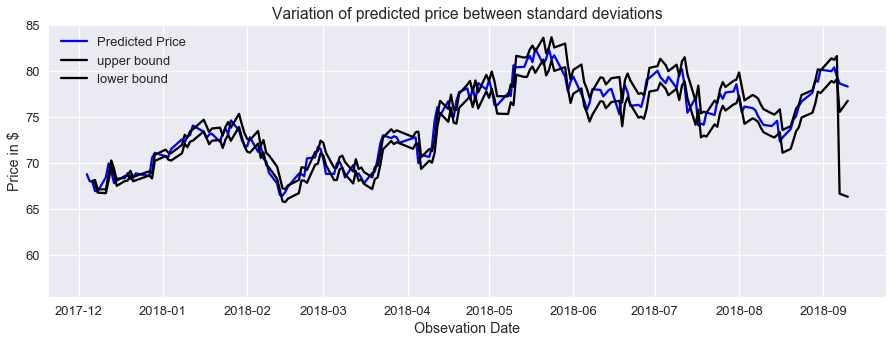

In [22]:
start_date = '2018-09-10'
end_date = '2017-12-04'

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(dataplot.loc[start_date:end_date, :].index, dataplot.loc[start_date:end_date, 'FCRUDEOIL'], label = 'Predicted Price', color = 'blue')
ax.plot(dataplot.loc[start_date:end_date, :].index, dataplot.loc[start_date:end_date, 'PCRUDEOIL'], label = 'upper bound', color = 'black')
ax.plot(dataplot.loc[start_date:end_date, :].index, dataplot.loc[start_date:end_date, 'CRUDEOIL'], label = 'lower bound', color = 'black')


ax.legend(loc='best')
ax.set_title('Variation of predicted price between standard deviations')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
